<a href="https://colab.research.google.com/github/hrstnikolov/Mathematics-for-Developers/blob/main/Intro_to_NNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

import tensorflow as tf
from tensorflow import keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input, Dense

# Intro to NNs

## Computational graphs

In [13]:
# Using tf functions
a = tf.constant(7)
b = tf.constant(5)

def compute(a, b):
    return tf.pow(tf.add(tf.multiply(2, a), tf.multiply(3, b)), 2)

compute(a, b).numpy()

841

In [14]:
# Simpler
def compute(a, b):
    return (2 * a + 3 * b) ** 2

compute(a, b).numpy()

841

In [16]:
# Functions works with any type of inputs
compute(2.0, 3.0)
compute(np.array([2, 3, 4]), np.array([3, 4, 5]))
compute(tf.constant(2), tf.constant(3))
compute(tf.constant([2, 3, 4]), tf.constant([3, 4, 5]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([169, 324, 529], dtype=int32)>

In [28]:
# TODO Visualize the computational graph.
# @tf.function
# def compute(a, b):
#     return (2 * a + 3 * b) ** 2

# %load_ext tensorboard

# # Set up logging.
# stamp = datetime.now().strftime("%Y%m%d-%H%M%S")
# logdir = 'logs/func/%s' % stamp
# writer = tf.summary.create_file_writer(logdir)

# a, b = tf.constant([2, 3, 4]), tf.constant([3, 4, 5])
# tf.summary.trace_on(graph = True, profiler = True)
# result = compute(a, b)
# print(result.numpy())

# with writer.as_default():
#     tf.summary.trace_export(
#         name = "compute_trace",
#         step = 0,
#         profiler_outdir = "logs"
#     )

## MNIST

In [14]:
(mnist_attributes_train, mnist_labels_train),  (mnist_attributes_test, mnist_labels_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [15]:
mnist_attributes_train.shape

(60000, 28, 28)

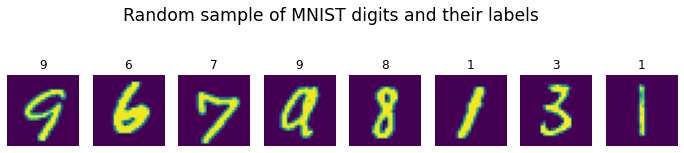

In [50]:
def plot_random_mnist_digits(attributes, labels):
    indeces = np.random.randint(0, len(attributes), size=(8,))    
    fig, axs = plt.subplots(nrows=1, ncols=8, figsize=(12,3))
    for i, ax in zip(indeces, axs.ravel()):
        ax.set_title(labels[i])
        ax.imshow(attributes[i])
        ax.axis('off')
    plt.suptitle('Random sample of MNIST digits and their labels', fontsize='xx-large')

plot_random_mnist_digits(mnist_attributes_train, mnist_labels_train)